In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# Getting Data

In [2]:
df = pd.read_excel('default_of_credit_card_clients.xls', engine='xlrd')
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,798fc410-45c1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,8a8c8f3b-8eb4,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,85698822-43f5,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,0737c11b-be42,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,3b7f77cc-dbc0,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


# Exploring Data

In [3]:
df.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_1',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default payment next month'],
      dtype='object')

In [4]:
df.shape

(30000, 25)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   ID                          30000 non-null  object
 1   LIMIT_BAL                   30000 non-null  int64 
 2   SEX                         30000 non-null  int64 
 3   EDUCATION                   30000 non-null  int64 
 4   MARRIAGE                    30000 non-null  int64 
 5   AGE                         30000 non-null  int64 
 6   PAY_1                       30000 non-null  object
 7   PAY_2                       30000 non-null  int64 
 8   PAY_3                       30000 non-null  int64 
 9   PAY_4                       30000 non-null  int64 
 10  PAY_5                       30000 non-null  int64 
 11  PAY_6                       30000 non-null  int64 
 12  BILL_AMT1                   30000 non-null  int64 
 13  BILL_AMT2                   30000 non-null  in

In [6]:
pay_columns = ['PAY_1', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']
bill_atm_cols = ['BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6']
pay_amt_cols = ['PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']

In [7]:
for col in pay_columns:    
    print(f'{col} unique values:', df[col].unique().tolist())
    
print('Default payment unique values:', df['default payment next month'].unique().tolist())
print('Education unique values:', df['EDUCATION'].unique().tolist())
print('Marriage unique values:', df['MARRIAGE'].unique().tolist())

PAY_1 unique values: [2, -1, 0, -2, 1, 'Not available', 3, 4, 8, 7, 5, 6]
PAY_2 unique values: [2, 0, -1, -2, 3, 5, 7, 4, 1, 6, 8]
PAY_3 unique values: [-1, 0, 2, -2, 3, 4, 6, 7, 1, 5, 8]
PAY_4 unique values: [-1, 0, -2, 2, 3, 4, 5, 7, 6, 1, 8]
PAY_5 unique values: [-2, 0, -1, 2, 3, 5, 4, 7, 8, 6]
PAY_6 unique values: [-2, 2, 0, -1, 3, 6, 4, 7, 8, 5]
Default payment unique values: [1, 0]
Education unique values: [2, 1, 3, 5, 0, 4, 6]
Marriage unique values: [1, 2, 3, 0]


In [8]:
wrong_values = df[df['PAY_1'] == 'Not available'].index
df.drop(wrong_values, inplace=True)
df['PAY_1'] = df['PAY_1'].astype(np.int64)
print('Fixed PAY_1 values:', sorted(df['PAY_1'].unique().tolist()))

df['MARRIAGE'] = df['MARRIAGE'].replace(to_replace=0, value=3)
print('Fixed MARRIAGE values:', sorted(df['MARRIAGE'].unique().tolist()))

df['EDUCATION'] = df['EDUCATION'].replace(to_replace=[0, 5, 6], value=4)
print('Fixed EDUCATION values:', sorted(df['EDUCATION'].unique().tolist()))

Fixed PAY_1 values: [-2, -1, 0, 1, 2, 3, 4, 5, 6, 7, 8]
Fixed MARRIAGE values: [1, 2, 3]
Fixed EDUCATION values: [1, 2, 3, 4]


In [9]:
for col in pay_columns:    
    print(f'{col} values count: \n', df[col].value_counts(), '\n')

print(f'Default values count: \n', df['default payment next month'].value_counts(), '\n')
print(f'Education values count: \n', df['EDUCATION'].value_counts(), '\n')
print(f'Marriage values count: \n', df['MARRIAGE'].value_counts(), '\n')

PAY_1 values count: 
 PAY_1
 0    13402
-1     5047
 1     3261
-2     2476
 2     2378
 3      292
 4       63
 5       23
 8       17
 6       11
 7        9
Name: count, dtype: int64 

PAY_2 values count: 
 PAY_2
 0    14276
-1     5368
 2     3509
-2     3375
 3      289
 4       85
 5       24
 1       24
 7       17
 6       11
 8        1
Name: count, dtype: int64 

PAY_3 values count: 
 PAY_3
 0    14283
-1     5290
-2     3654
 2     3400
 3      214
 4       69
 7       24
 5       20
 6       19
 1        3
 8        3
Name: count, dtype: int64 

PAY_4 values count: 
 PAY_4
 0    14911
-1     5070
-2     3893
 2     2798
 3      161
 4       57
 7       51
 5       30
 6        4
 1        2
 8        2
Name: count, dtype: int64 

PAY_5 values count: 
 PAY_5
 0    15347
-1     4949
-2     4056
 2     2335
 3      151
 4       71
 7       53
 5       14
 6        2
 8        1
Name: count, dtype: int64 

PAY_6 values count: 
 PAY_6
 0    14731
-1     5138
-2     4366
 2     2

In [10]:
print('Nulls: ', df.isnull().sum(), '\n')
print('Duplicates: ', df.duplicated().sum(), '\n')
print('Duplicated IDs: ', df['ID'].duplicated().sum(), '\n')

Nulls:  ID                            0
LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_1                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default payment next month    0
dtype: int64 

Duplicates:  0 

Duplicated IDs:  275 



In [11]:
duplicated_ids = df['ID'].duplicated()
duplicated_ids_index = df[duplicated_ids == True].index
df.drop(duplicated_ids_index, inplace=True)
print('Duplicated IDs: ', df['ID'].duplicated().sum())

Duplicated IDs:  0


In [12]:
df.drop(columns='ID', inplace=True)

In [13]:
df[pay_columns].describe()

,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6
count,26704.000000,26704.000000,26704.000000,26704.000000,26704.000000,26704.000000
mean,-0.017750,-0.133164,-0.167428,-0.224685,-0.269360,-0.293140
std,1.125925,1.197753,1.198284,1.167054,1.130935,1.149423
min,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000
25%,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000


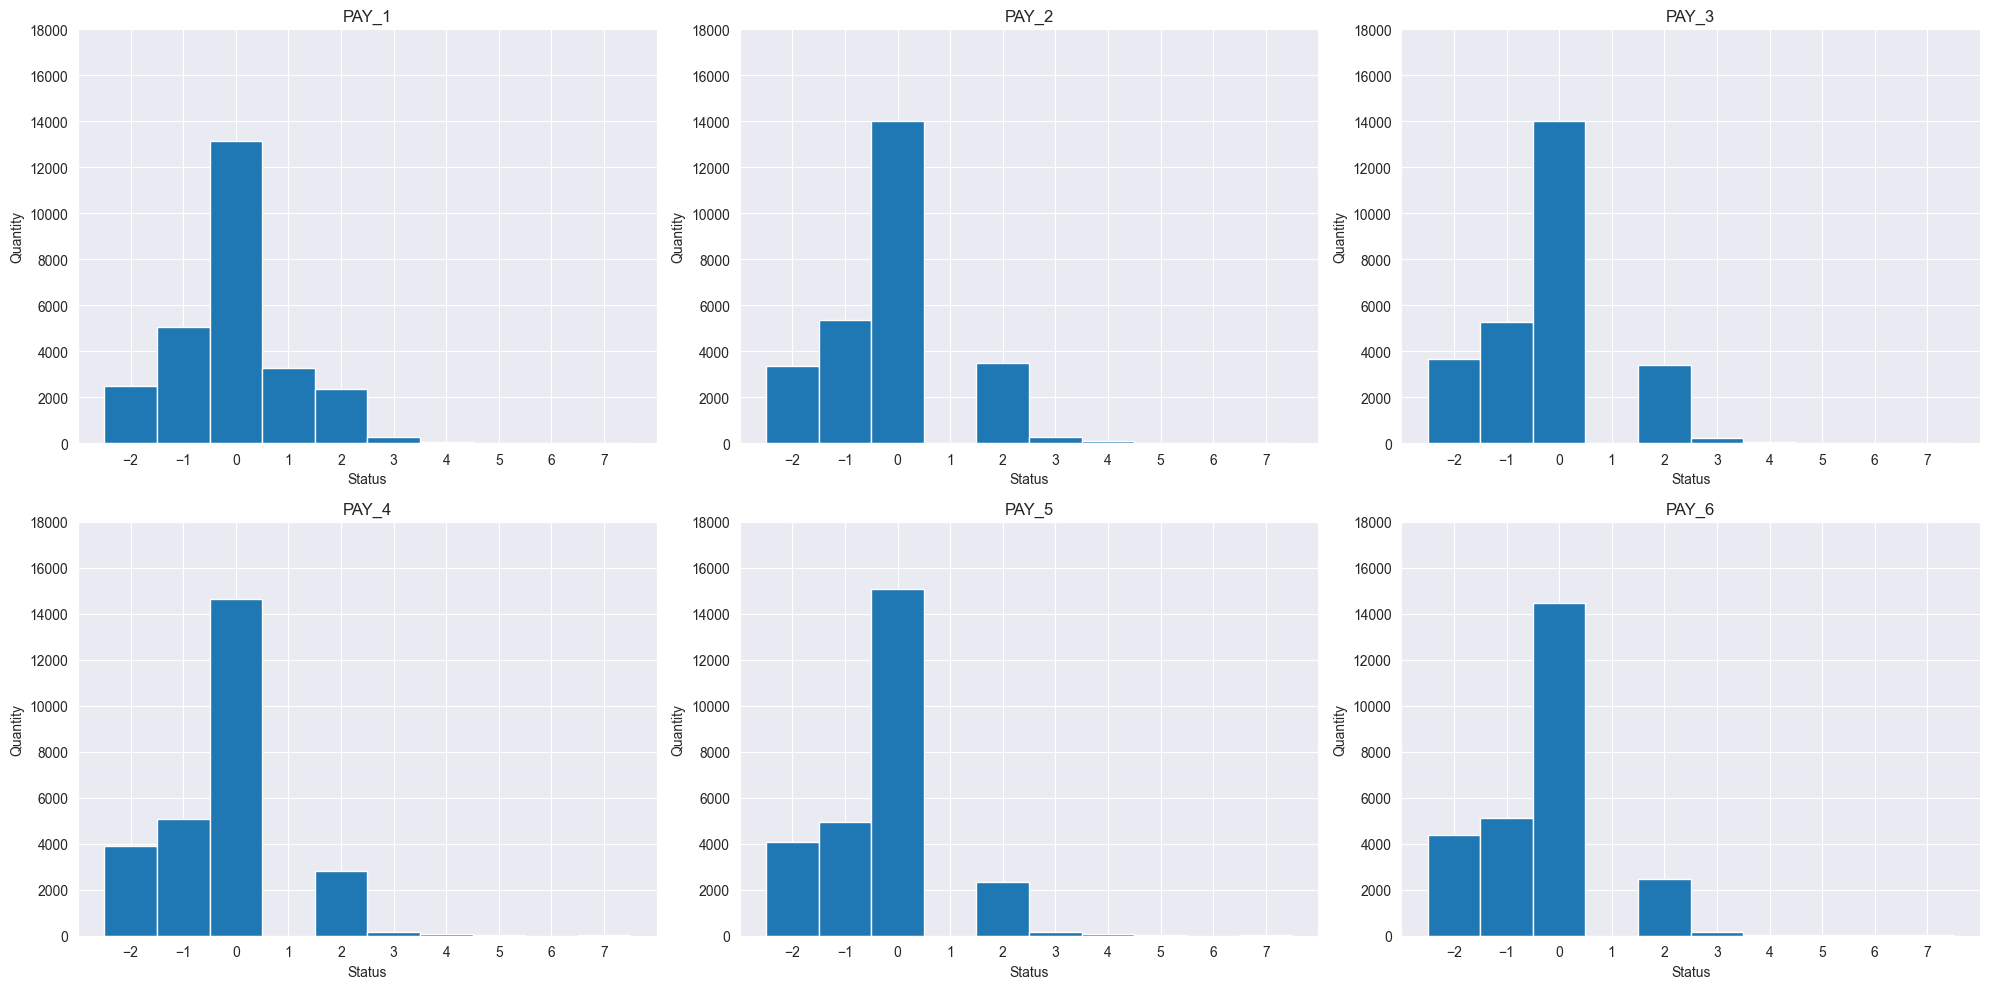

In [14]:
x_nums = np.arange(-2, 9, 1) - 0.5
X_nums_range = range(-2, 8, 1)
y_nums_range = range(-0, 20000, 2000)

max_row = 2
max_col = 3

fig, axes = plt.subplots(nrows=max_row, ncols=max_col, figsize=(20, 10))

for i, col in enumerate(pay_columns):
    n_row = i // max_col
    n_col = i % max_col
    
    ax = axes[n_row, n_col]
    ax.hist(df[col], bins=x_nums)
    ax.set_title(col)
    ax.set_xlabel('Status')
    ax.set_ylabel('Quantity')
    ax.set_xticks(X_nums_range)
    ax.set_yticks(y_nums_range)
    
plt.tight_layout()

In [15]:
cols_to_delete = pay_columns[1:]
df.drop(columns=cols_to_delete, inplace=True)

In [16]:
df[bill_atm_cols].describe()

,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6
count,26704.000000,26704.000000,26704.000000,26704.000000,26704.000000,26704.000000
mean,51328.729928,49226.154883,46955.899154,43273.977082,40277.714088,38831.619083
std,73605.370484,70907.040150,68677.967073,64248.958509,60680.516863,59407.053700
min,-165580.000000,-69777.000000,-157264.000000,-170000.000000,-81334.000000,-339603.000000
25%,3526.750000,2958.500000,2576.750000,2310.000000,1714.750000,1230.000000
50%,22284.500000,21058.000000,20034.000000,19000.000000,18020.000000,16944.500000
75%,67572.250000,64251.250000,60260.000000,54617.750000,50211.000000,49146.250000
max,746814.000000,671563.000000,855086.000000,706864.000000,823540.000000,699944.000000


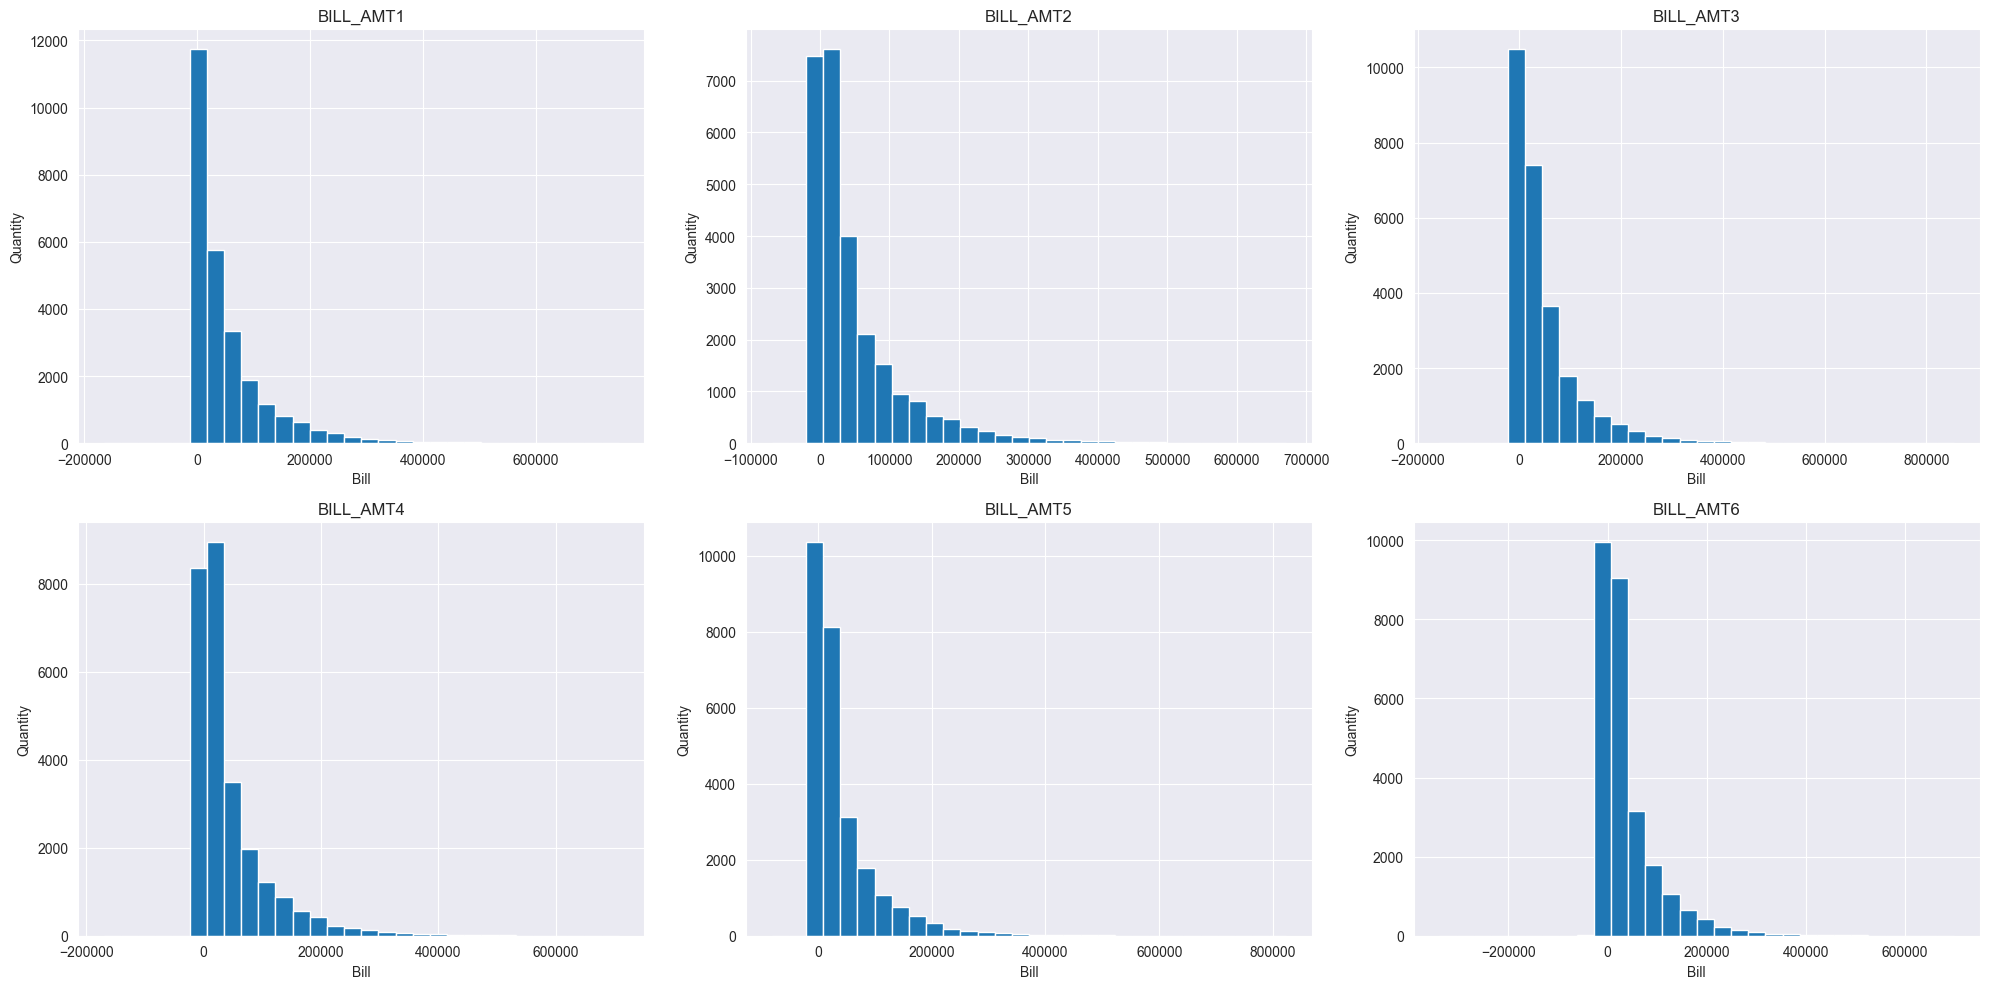

In [17]:
max_row = 2
max_col = 3

fig, axes = plt.subplots(nrows=max_row, ncols=max_col, figsize=(20, 10))

for i, col in enumerate(bill_atm_cols):
    n_row = i // max_col
    n_col = i % max_col
    
    ax = axes[n_row, n_col]
    ax.hist(df[col], bins=30)
    ax.set_xlabel('Bill')
    ax.set_ylabel('Quantity')
    ax.set_title(col)
    
plt.tight_layout()

In [18]:
df[pay_amt_cols].describe()

,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
count,26704.000000,2.670400e+04,26704.000000,26704.000000,26704.000000,26704.000000
mean,5695.541604,5.872301e+03,5251.636721,4879.728393,4836.474536,5249.967308
std,16688.344569,2.119963e+04,17253.702321,15945.514096,15301.396069,17623.427793
min,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000
25%,999.750000,7.915000e+02,390.000000,287.000000,227.750000,100.000000
50%,2106.000000,2.005000e+03,1809.500000,1500.000000,1500.000000,1500.000000
75%,5024.000000,5.000000e+03,4541.250000,4034.250000,4071.250000,4009.250000
max,873552.000000,1.227082e+06,889043.000000,621000.000000,426529.000000,528666.000000


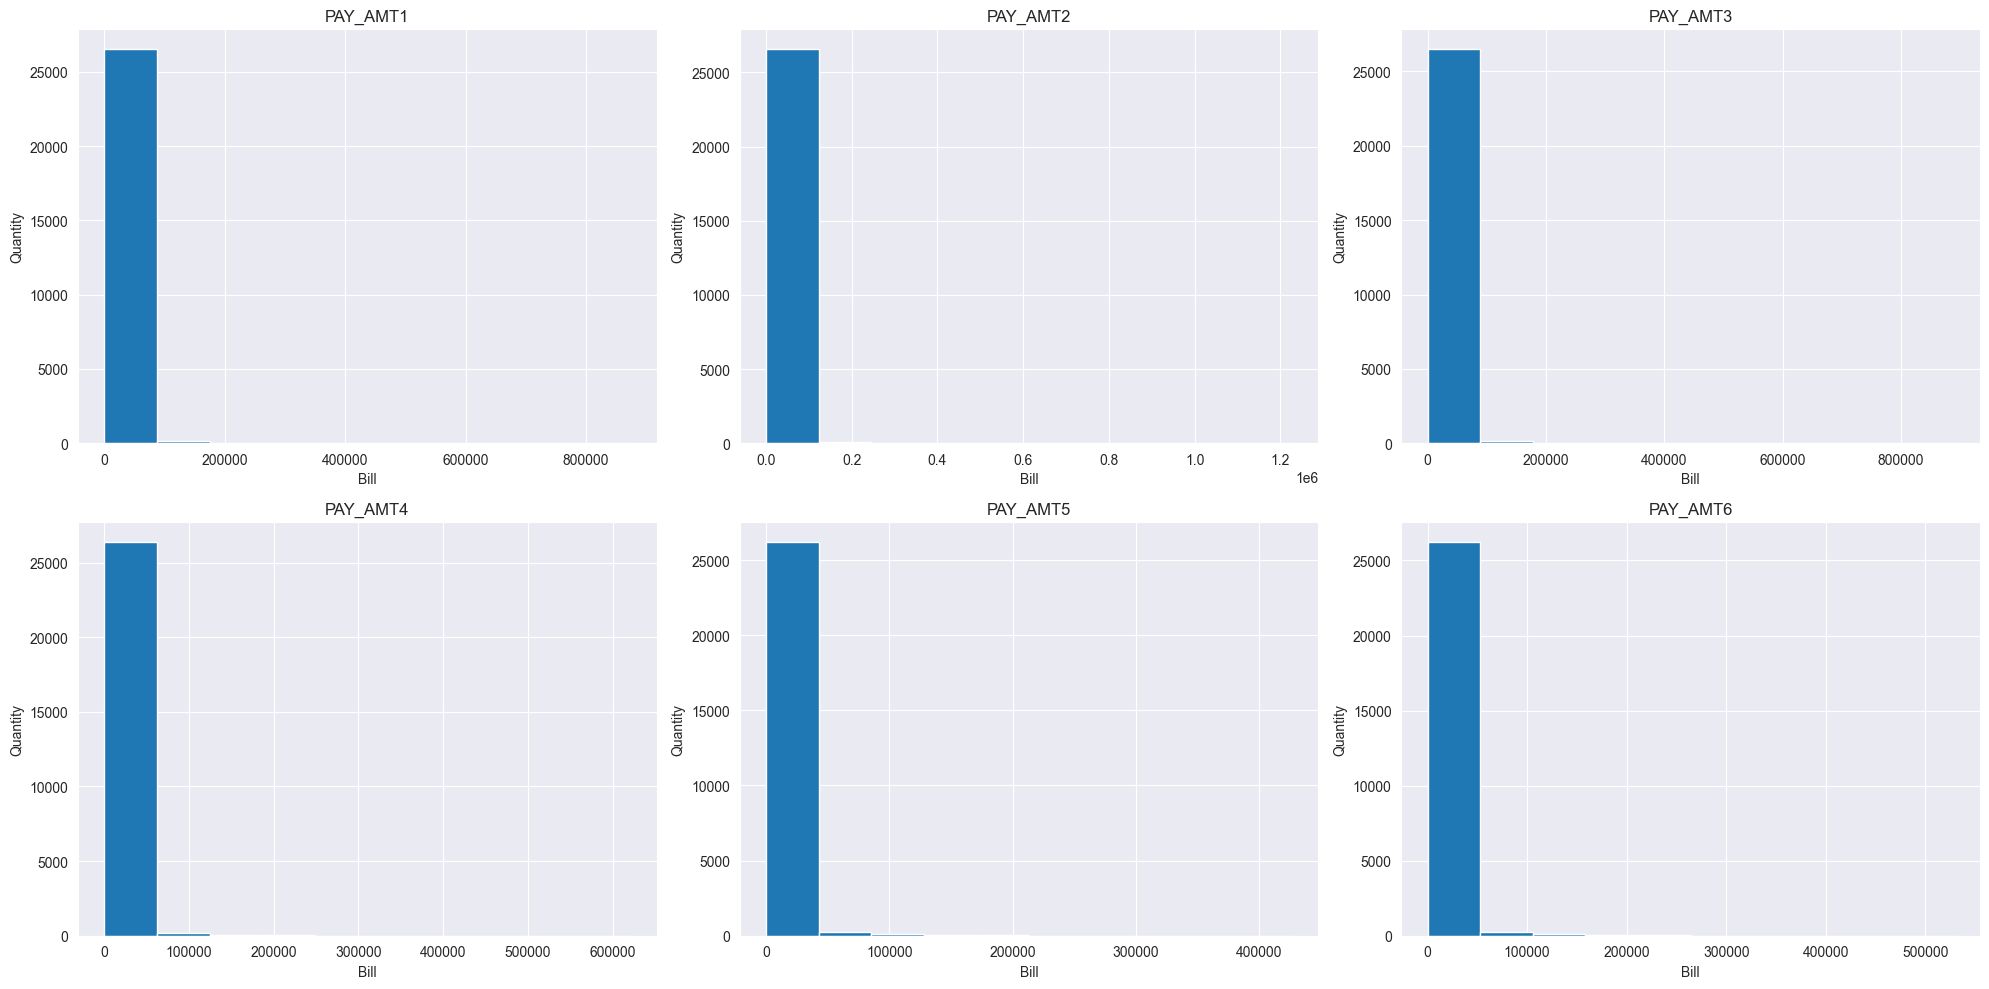

In [19]:
max_row = 2
max_col = 3

fig, axes = plt.subplots(nrows=max_row, ncols=max_col, figsize=(20, 10))

for i, col in enumerate(pay_amt_cols):
    n_row = i // max_col
    n_col = i % max_col
    
    ax = axes[n_row, n_col]
    ax.hist(df[col], bins=10)
    ax.set_xlabel('Bill')
    ax.set_ylabel('Quantity')
    ax.set_title(col)
    
plt.tight_layout()

In [20]:
columns = ['SEX', 'EDUCATION', 'MARRIAGE', 'default payment next month']
df[columns].describe()

,SEX,EDUCATION,MARRIAGE,default payment next month
count,26704.000000,26704.000000,26704.000000,26704.000000
mean,1.600659,1.845566,1.558194,0.221465
std,0.492821,0.748768,0.524056,0.415241
min,0.000000,1.000000,1.000000,0.000000
25%,1.000000,1.000000,1.000000,0.000000
50%,2.000000,2.000000,2.000000,0.000000
75%,2.000000,2.000000,2.000000,0.000000
max,2.000000,4.000000,3.000000,1.000000


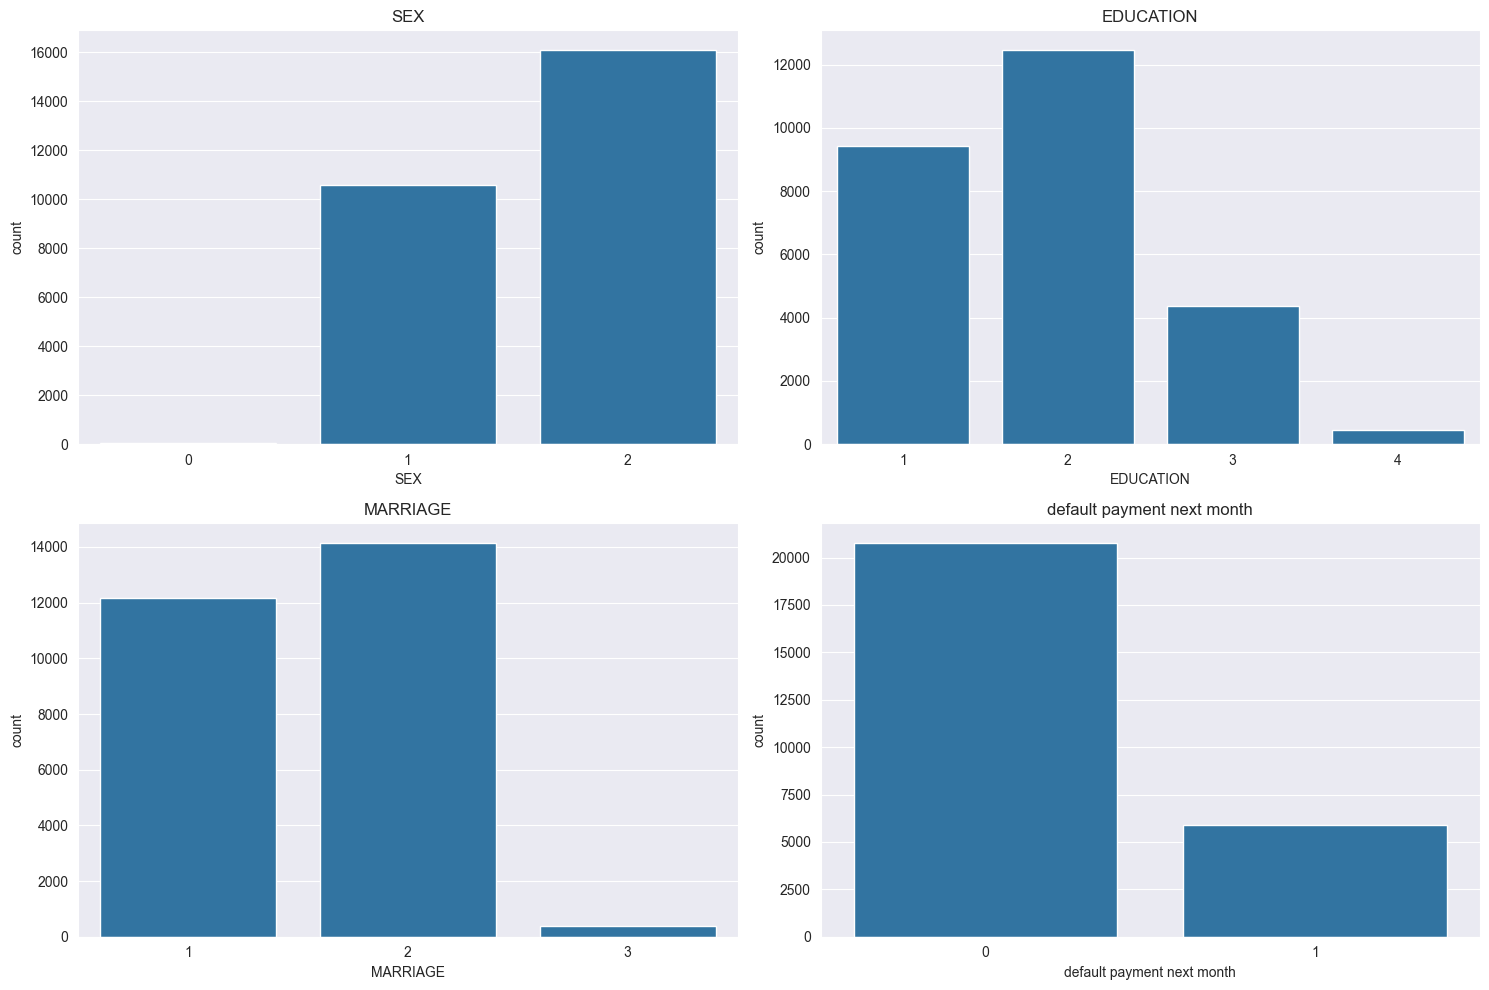

In [21]:
max_row = 2
max_col = 2

fig, axes = plt.subplots(nrows=max_row, ncols=max_col, figsize=(15, 10))

for i, col in enumerate(columns):
    n_row = i // max_col
    n_col = i % max_col
    
    ax = axes[n_row, n_col]
    sns.countplot(ax=ax, x=df[col])
    ax.set_title(col)
    
plt.tight_layout()

In [22]:
columns = ['AGE', 'LIMIT_BAL']
df[columns].describe()

,AGE,LIMIT_BAL
count,26704.000000,26704.000000
mean,35.452030,167667.528460
std,9.322213,129904.599437
min,0.000000,0.000000
25%,28.000000,50000.000000
50%,34.000000,140000.000000
75%,41.000000,240000.000000
max,79.000000,800000.000000


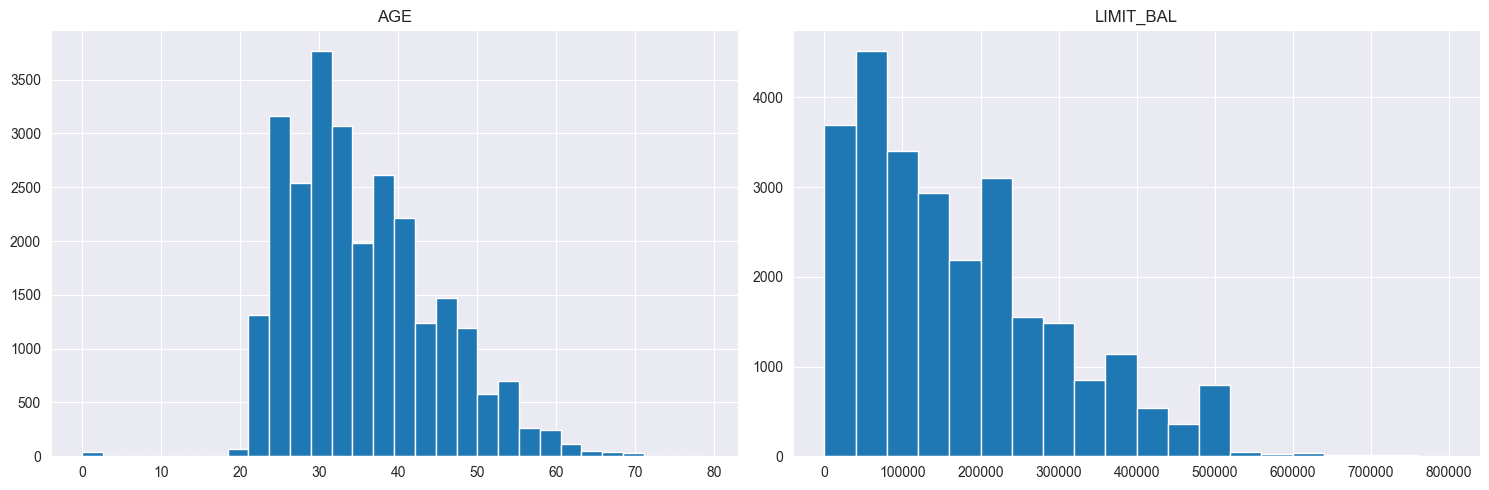

In [23]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))

axes[0].hist(df[columns[0]], bins=30)
axes[0].set_title(columns[0])

axes[1].hist(df[columns[1]], bins=20)
axes[1].set_title(columns[1])

plt.tight_layout()

(array([5.690e+02, 1.814e+03, 2.163e+03, 2.540e+03, 2.686e+03, 2.115e+03,
        2.034e+03, 1.985e+03, 1.762e+03, 1.623e+03, 1.438e+03, 1.234e+03,
        1.040e+03, 8.550e+02, 4.040e+02, 6.730e+02, 5.760e+02, 4.000e+02,
        2.650e+02, 1.860e+02, 1.090e+02, 6.800e+01, 4.700e+01, 3.700e+01,
        1.700e+01, 1.200e+01, 7.000e+00, 4.000e+00, 0.000e+00, 1.000e+00]),
 array([21.        , 22.93333333, 24.86666667, 26.8       , 28.73333333,
        30.66666667, 32.6       , 34.53333333, 36.46666667, 38.4       ,
        40.33333333, 42.26666667, 44.2       , 46.13333333, 48.06666667,
        50.        , 51.93333333, 53.86666667, 55.8       , 57.73333333,
        59.66666667, 61.6       , 63.53333333, 65.46666667, 67.4       ,
        69.33333333, 71.26666667, 73.2       , 75.13333333, 77.06666667,
        79.        ]),
 <BarContainer object of 30 artists>)

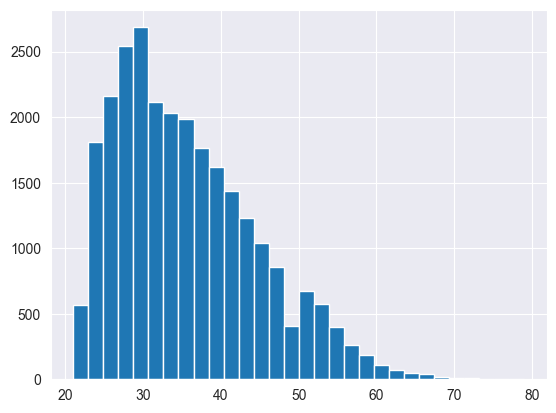

In [24]:
unacceptable_ages = df[df['AGE'] < 18].index
df.drop(unacceptable_ages, inplace=True)

plt.hist(df[columns[0]], bins=30)

# Extracting Features

<Axes: >

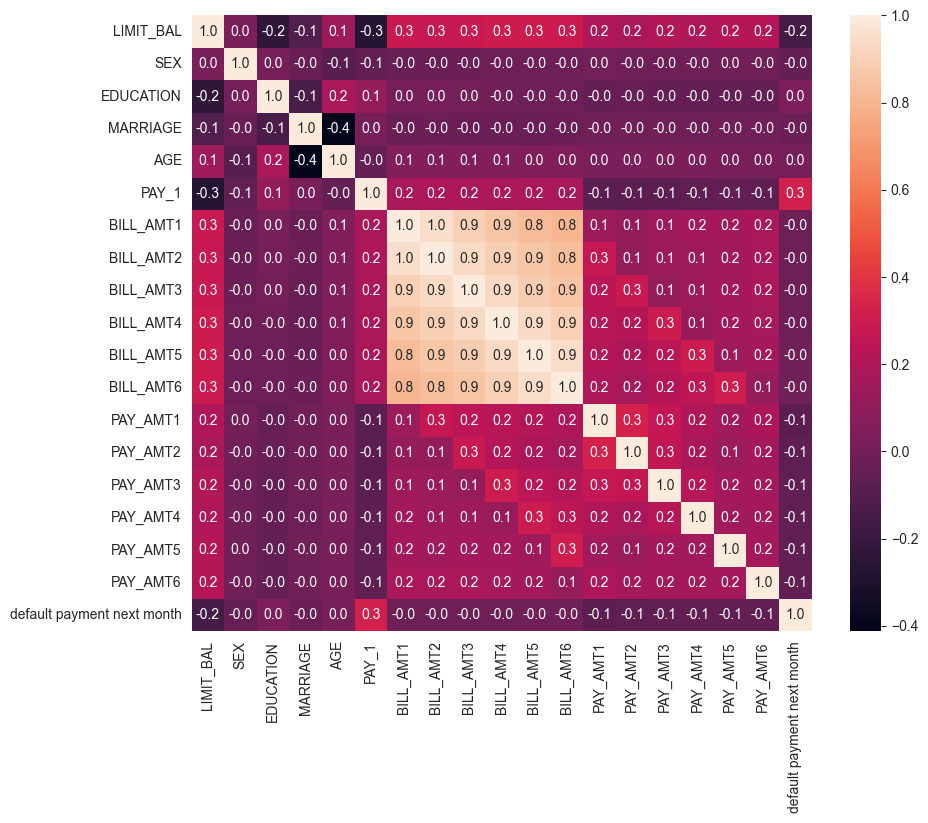

In [25]:
corr = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, fmt='.1f')

In [26]:
from sklearn.feature_selection import f_classif, SelectKBest

X = df.drop(columns='default payment next month')
y = df['default payment next month']

best_features = SelectKBest(score_func=f_classif, k=5)
best_features.fit(X, y)

selected_mask = best_features.get_support()
selected_cols = X.columns[selected_mask].tolist()
print(selected_cols)

['LIMIT_BAL', 'PAY_1', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3']


<Axes: xlabel='PAY_1', ylabel='count'>

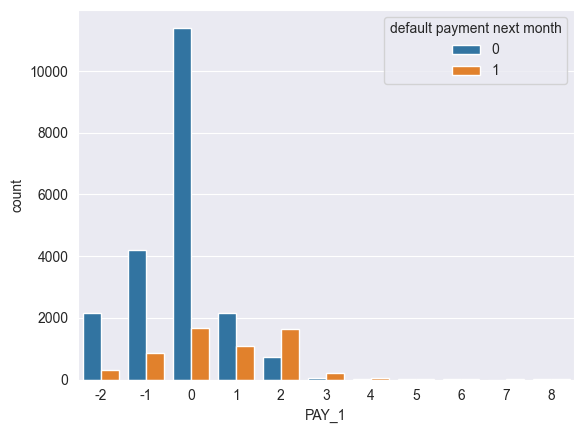

In [27]:
payments_grouped_by_bill = df.groupby('default payment next month')['PAY_1'].value_counts().reset_index()
sns.barplot(data=payments_grouped_by_bill, x='PAY_1', y='count', hue='default payment next month')

    PAY_1  default payment next month
0      -2                    0.131664
1      -1                    0.170002
2       0                    0.128295
3       1                    0.336400
4       2                    0.694701
5       3                    0.773973
6       4                    0.682540
7       5                    0.434783
8       6                    0.545455
9       7                    0.777778
10      8                    0.588235


([<matplotlib.axis.XTick at 0x141a14ce750>,
 [Text(-2, 0, '−2'),
  Text(-1, 0, '−1'),
  Text(0, 0, '0'),
  Text(1, 0, '1'),
  Text(2, 0, '2'),
  Text(3, 0, '3'),
  Text(4, 0, '4'),
  Text(5, 0, '5'),
  Text(6, 0, '6'),
  Text(7, 0, '7'),
  Text(8, 0, '8')])

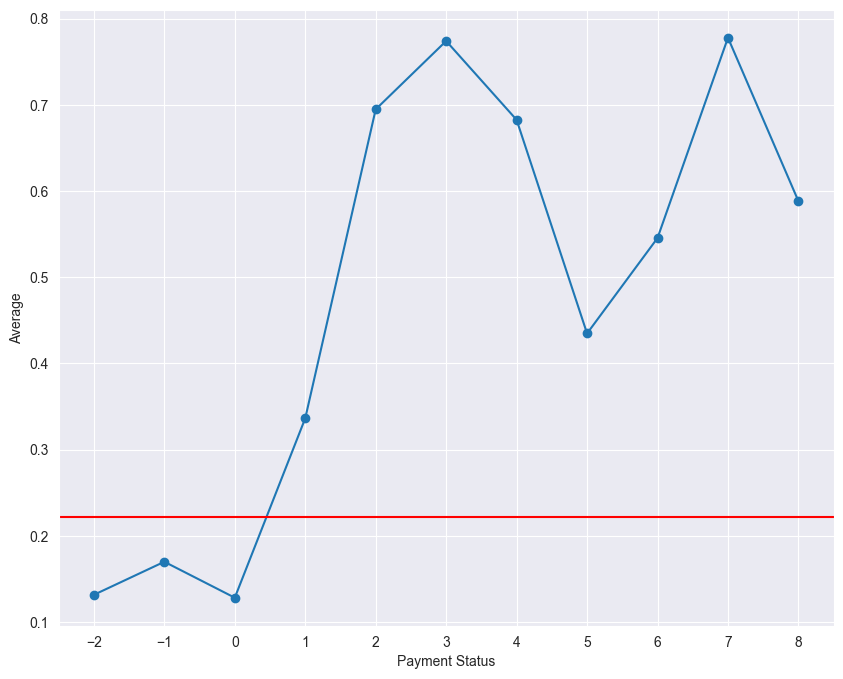

In [28]:
defaulted_limit_mean = df.groupby('PAY_1')['default payment next month'].mean().reset_index()
print(defaulted_limit_mean)
default_mean = df['default payment next month'].mean()

plt.figure(figsize=(10, 8))
plt.plot(defaulted_limit_mean['PAY_1'], defaulted_limit_mean['default payment next month'], marker='o')
plt.axhline(default_mean, color='r')
plt.xlabel('Payment Status')
plt.ylabel('Average')
plt.xticks(np.arange(-2, 9))

## Training Model

### Logistic regression

In [29]:
def cross_val_C_search_pipe(X, y, k_folds, C_vals, pipline):
    folds_n = k_folds.n_splits
    C_vals_n = len(C_vals)
    X_train_roc_auc_score = np.empty((folds_n, C_vals_n))
    X_test_roc_auc_score = np.empty((folds_n, C_vals_n))
    
    for C_value_index in range(C_vals_n):
        fold_counter = 0
        pipline.set_params(clf__C=C_vals[C_value_index])
        
        for train_index, test_index in k_folds.split(X, y):
            cv_X_train, cv_X_test = X.iloc[train_index], X.iloc[test_index]
            cv_y_train, cv_y_test = y.iloc[train_index], y.iloc[test_index]
            
            pipline.fit(cv_X_train, cv_y_train)
            
            cv_train_probs = pipline.predict_proba(cv_X_train)
            train_score = roc_auc_score(cv_y_train, cv_train_probs[:, 1])
            X_train_roc_auc_score[fold_counter, C_value_index] = train_score

            cv_test_probs = pipline.predict_proba(cv_X_test)
            test_score = roc_auc_score(cv_y_test, cv_test_probs[:, 1])
            X_test_roc_auc_score[fold_counter, C_value_index] = test_score
            
            fold_counter += 1
        
        print('Done With C = {}'.format(C_vals[C_value_index]))

    return X_train_roc_auc_score, X_test_roc_auc_score

Done With C = 0.001
Done With C = 0.01
Done With C = 0.1
Done With C = 1.0
Done With C = 10.0
Done With C = 100.0


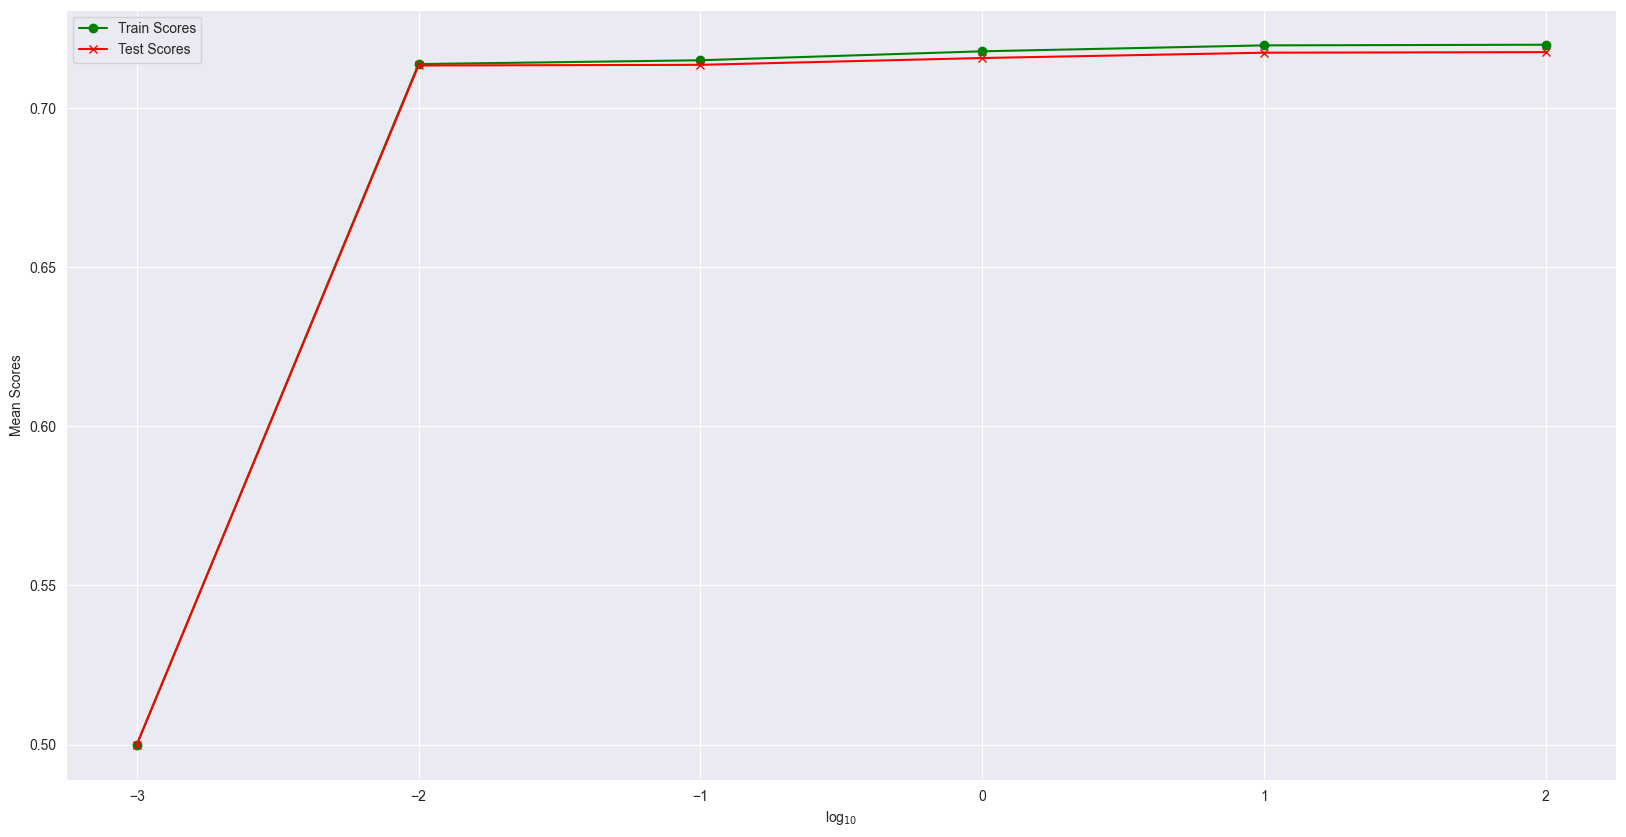

In [30]:
from sklearn.model_selection import train_test_split, KFold
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

scaler = MinMaxScaler()
folds = KFold(n_splits=5)
clf = LogisticRegression(solver='saga', penalty='l1', max_iter=1000, n_jobs=-1)

pipe = Pipeline([('scaler', MinMaxScaler()), ('clf', clf)])

c_values_power = np.linspace(-3, 2, 6)
c_values_num = 10.0**c_values_power
train_scores, test_scores = cross_val_C_search_pipe(X_train, y_train, folds, c_values_num, pipe)

fig = plt.figure(figsize=(20, 10))
plt.plot(c_values_power, np.mean(train_scores, axis=0), 'g-o', label='Train Scores')
plt.plot(c_values_power, np.mean(test_scores, axis=0), 'r-x', label='Test Scores')
plt.xlabel('log$_{10}$')
plt.ylabel('Mean Scores')
plt.legend()

#### Adding New Features

In [31]:
from sklearn.preprocessing import PolynomialFeatures

interaction_maker = PolynomialFeatures(degree=2, interaction_only=True, include_bias=False)
X_interacts = interaction_maker.fit_transform(X[selected_cols])

X_interacts_df = pd.DataFrame(X_interacts)

#### Training New Features

Done With C = 0.001
Done With C = 0.01
Done With C = 0.1
Done With C = 1.0


C:\Users\ASUS\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\ASUS\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\ASUS\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\ASUS\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Done With C = 10.0


C:\Users\ASUS\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\ASUS\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\ASUS\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\ASUS\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Done With C = 100.0


C:\Users\ASUS\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


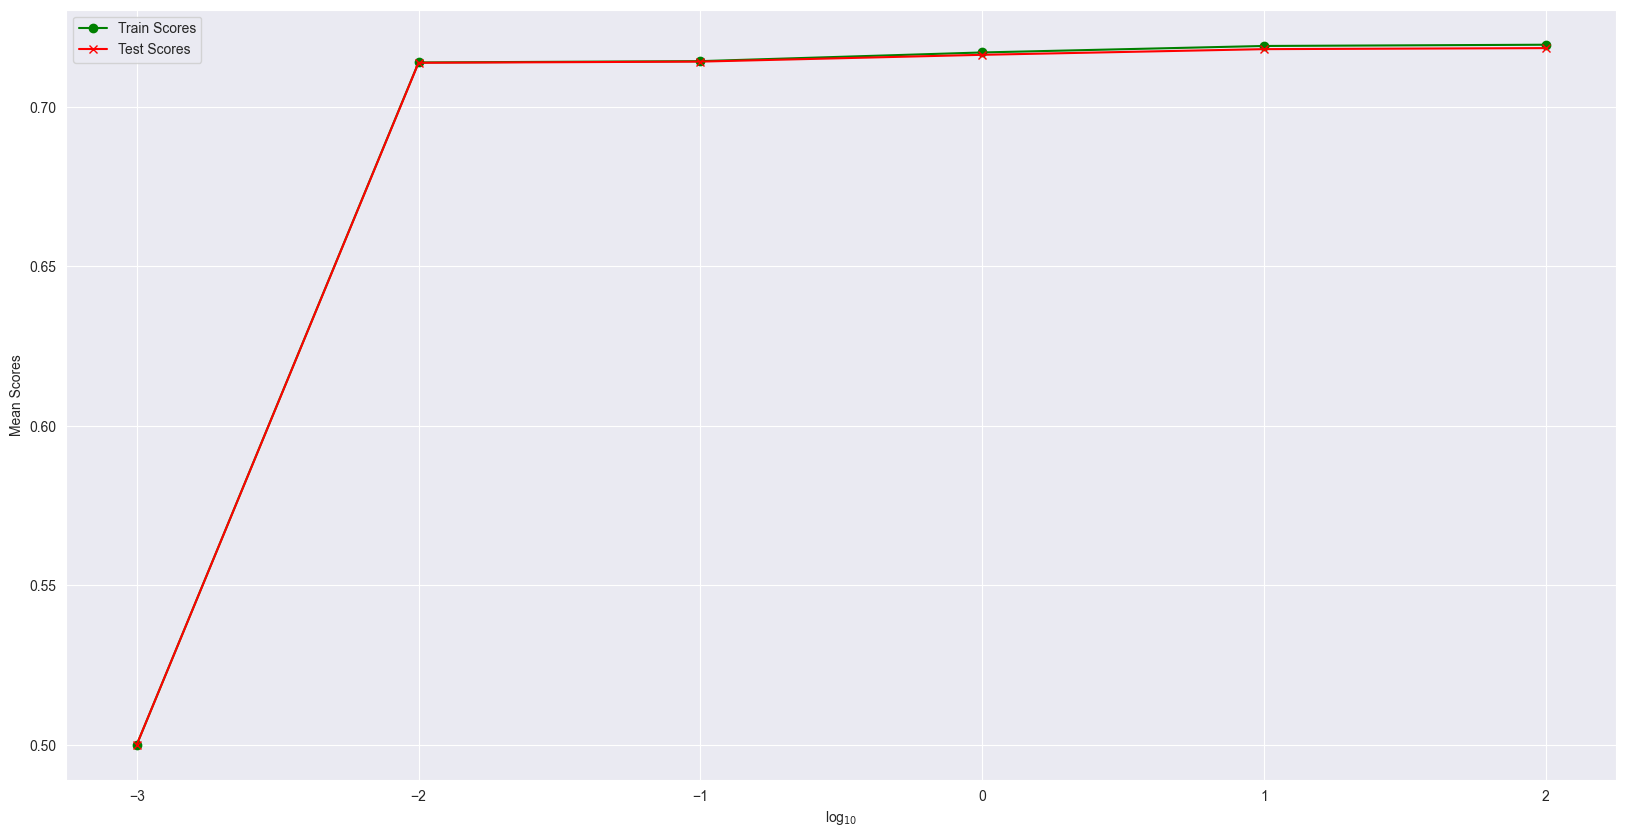

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X_interacts_df, y, test_size=0.2, random_state=42)
train_scores, test_scores = cross_val_C_search_pipe(X_train, y_train, folds, c_values_num, pipe)

fig = plt.figure(figsize=(20, 10))
plt.plot(c_values_power, np.mean(train_scores, axis=0), 'g-o', label='Train Scores')
plt.plot(c_values_power, np.mean(test_scores, axis=0), 'r-x', label='Test Scores')
plt.xlabel('log$_{10}$')
plt.ylabel('Mean Scores')
plt.legend()

### RandomForest

In [33]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

clf = RandomForestClassifier()

params = {'n_estimators': [10, 50, 100, 200], 'max_depth': [3, 6, 9, 12]}
grid = GridSearchCV(clf, param_grid=params, verbose=2, n_jobs=-1)
grid.fit(X_train, y_train)

grid_result_df = pd.DataFrame(grid.cv_results_)
grid_result_df.head()

Fitting 5 folds for each of 16 candidates, totalling 80 fits


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.128964,0.007480,0.003815,0.000930,3,10,"{'max_depth': 3, 'n_estimators': 10}",0.807359,0.803797,0.782232,0.800047,0.811533,0.800994,0.010123,13
1,0.586700,0.006599,0.008383,0.000487,3,50,"{'max_depth': 3, 'n_estimators': 50}",0.788845,0.808720,0.792077,0.796531,0.802157,0.797666,0.007109,15
2,1.158007,0.024061,0.014693,0.001142,3,100,"{'max_depth': 3, 'n_estimators': 100}",0.793766,0.806845,0.802625,0.796765,0.801922,0.800385,0.004605,14
3,2.369082,0.050183,0.028158,0.000763,3,200,"{'max_depth': 3, 'n_estimators': 200}",0.792829,0.796296,0.792780,0.796765,0.797000,0.795134,0.001916,16
4,0.238331,0.012318,0.004102,0.000317,6,10,"{'max_depth': 6, 'n_estimators': 10}",0.818139,0.814112,0.823722,0.810595,0.819972,0.817308,0.004565,10


Text(0, 0.5, 'Max Depth')

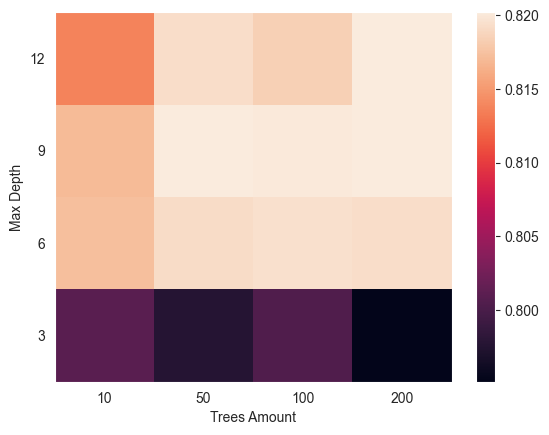

In [34]:
xx_mesh, yy_mesh = np.meshgrid(np.arange(5), np.arange(5))

ax = plt.axes()
pcolor_graph = ax.pcolormesh(xx_mesh, yy_mesh, grid_result_df['mean_test_score'].values.reshape(-4, 4))

plt.colorbar(pcolor_graph, ax=ax)
ax.set_xticks([0.5 ,1.5, 2.5, 3.5])
ax.set_yticks([0.5 ,1.5, 2.5, 3.5])
ax.set_xticklabels([10, 50, 100, 200])
ax.set_yticklabels([3, 6, 9, 12])
ax.set_xlabel('Trees Amount')
ax.set_ylabel('Max Depth')

In [35]:
features_importance_df = pd.DataFrame({
    'Features name': X.columns.tolist(),
    'Importance': grid.best_estimator_.feature_importances_
})

features_importance_df.sort_values('Importance', ascending=False)

,Features name,Importance
5,PAY_1,0.419075
12,PAY_AMT1,0.064853
0,LIMIT_BAL,0.059949
13,PAY_AMT2,0.053151
7,BILL_AMT2,0.044578
14,PAY_AMT3,0.042091
6,BILL_AMT1,0.041559
8,BILL_AMT3,0.041559
9,BILL_AMT4,0.033963
11,BILL_AMT6,0.033912


#### XGBOOST

Max Leaves wit Highest score: 200


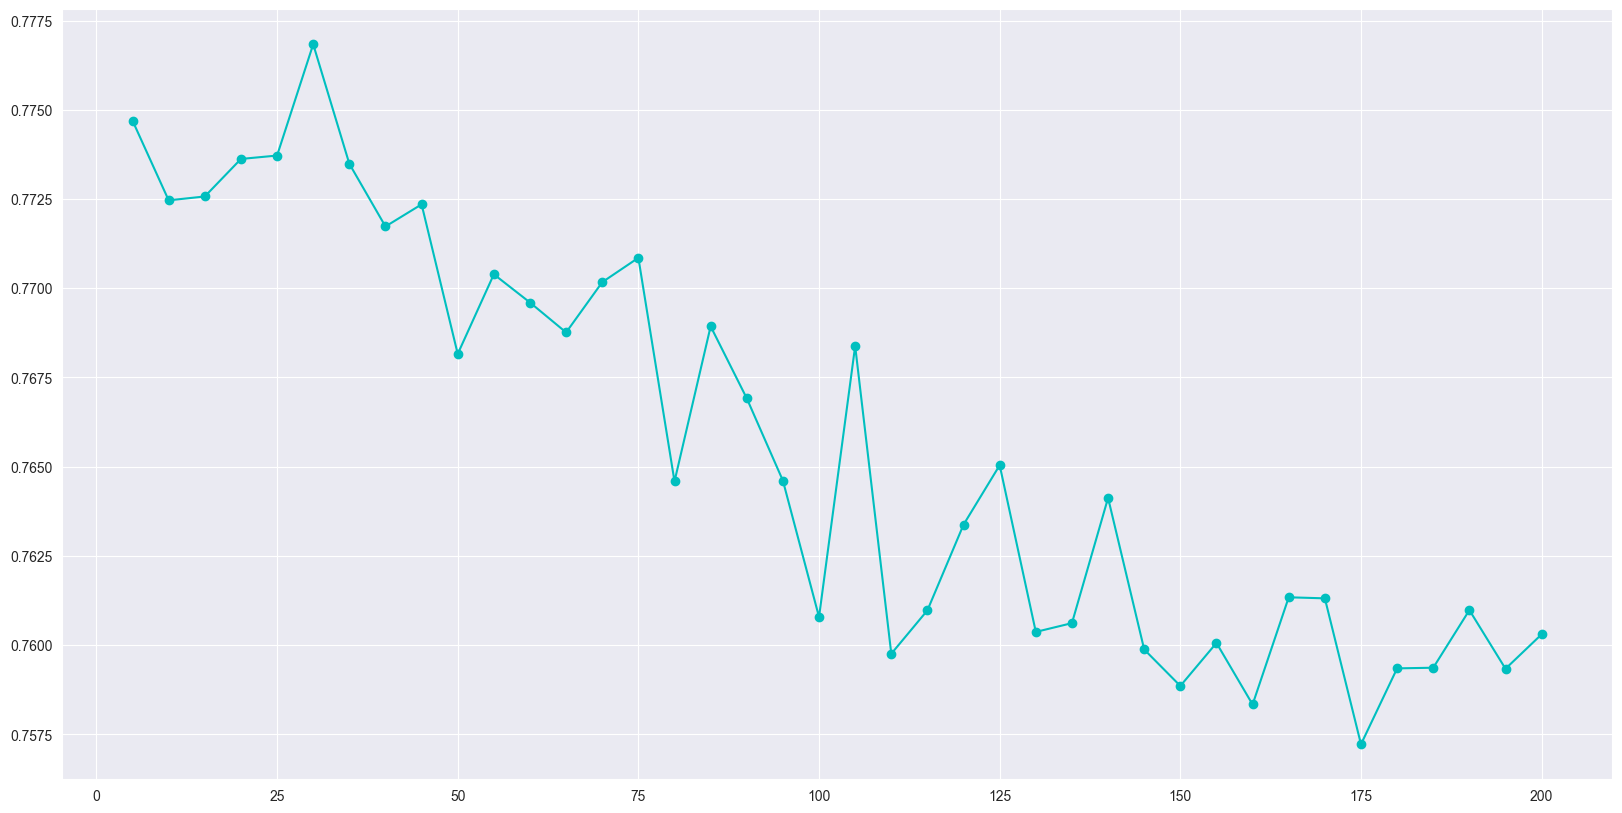

In [36]:
from xgboost import XGBClassifier
import shap

X_train_split, X_val, y_train_split, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

eval_set = (X_val, y_val)

model = XGBClassifier(n_estimators=1000,
                      max_depth=0,
                      grow_policy='lossguide',
                      tree_method='hist', 
                      eval_metric='auc',
                      verbosity=1, 
                      objective='binary:logistic', 
                      early_stopping_rounds=30)

max_leaves = np.arange(5, 205, 5)

vals_score = []
for max_leave in max_leaves:
    model.set_params(max_leaves=max_leave)
    model.fit(X_train_split, y_train_split, eval_set=[eval_set], verbose=False)

    val_probs = model.predict_proba(X_val)[:, 1]
    score = roc_auc_score(y_val, val_probs)
    vals_score.append(score)

max_leaves_df = pd.DataFrame(max_leaves, columns=['max_leaves'])
max_leaves_df['auc_score'] = vals_score

plt.figure(figsize=(20, 10))
plt.plot(max_leaves_df['max_leaves'], max_leaves_df['auc_score'], 'c-o')

print('Max Leaves wit Highest score:', max(max_leaves_df['max_leaves']))

In [37]:
from sklearn.model_selection import ParameterSampler

params_grid = { 'max_leaves': np.arange(5, 105, 5),
                'min_child_weight': np.arange(1, 100, 5),
                'colsample_bytree': np.arange(0.5, 1, 0.1),
                'subsample': np.arange(0.5, 1, 10),
                'learning_rate': np.arange(0.1, 1.1, 0.1)}

param_list = list(ParameterSampler(params_grid, 1000, random_state=42))

vals_score = []
for param in param_list:
    model.set_params(**param)
    model.fit(X_train_split, y_train_split, eval_set=[(X_val, y_val)], verbose=False)

    val_probs = model.predict_proba(X_val)[:, 1]
    score = roc_auc_score(y_val, val_probs)
    vals_score.append(score)

hyperparams_df = pd.DataFrame(param_list)
hyperparams_df['auc_score'] = vals_score

max_auc = hyperparams_df['auc_score'].max()
best_params_index = hyperparams_df[hyperparams_df['auc_score'] == max_auc].index[0]
best_params = param_list[best_params_index]
best_params

{'subsample': 0.5,
 'min_child_weight': 6,
 'max_leaves': 40,
 'learning_rate': 0.1,
 'colsample_bytree': 0.8999999999999999}

#### Traning Model with best parameters

In [38]:
xgboost = XGBClassifier(n_estimators=1000,
                        max_depth=0,
                        grow_policy='lossguide',
                        tree_method='hist',
                        objective='binary:logistic')

xgboost.set_params(**best_params)
xgboost.fit(X_train_split, y_train_split)

y_probs = xgboost.predict_proba(X_val)[:, 1]
y_pred = xgboost.predict(X_val)

auc_score = roc_auc_score(y_val, y_probs)
auc_score

0.7440698895113763

In [39]:
explainer = shap.explainers.Tree(xgboost, X_test)
shap_values = explainer(X_test)
shap_values.values.shape

100%|===================| 5332/5333 [03:46<00:00]        

(5333, 18)

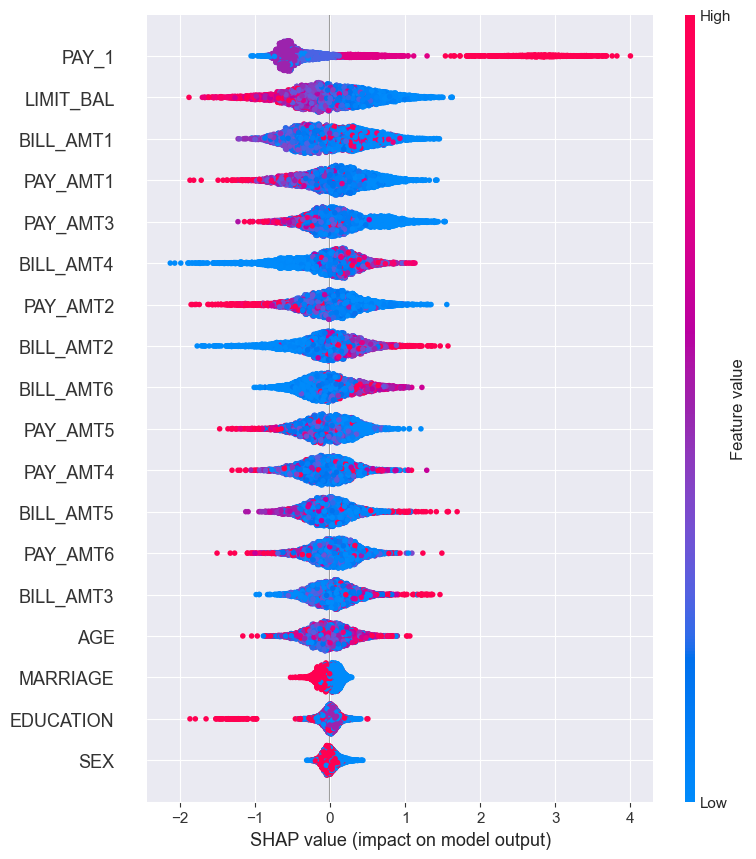

In [40]:
shap.summary_plot(shap_values.values, X_test)

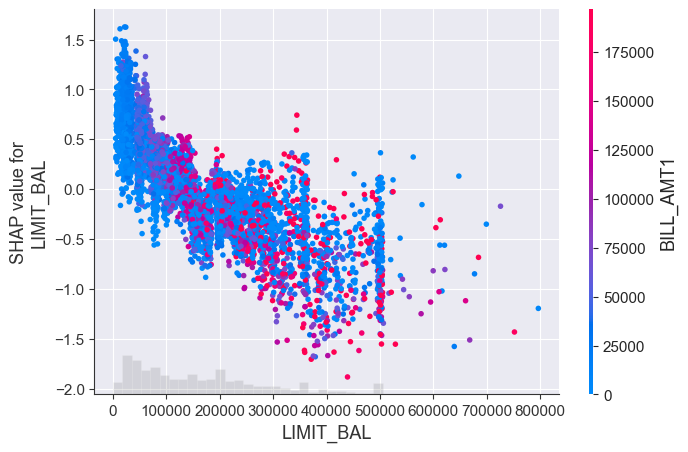

In [41]:
shap.plots.scatter(shap_values[:,'LIMIT_BAL'], color=shap_values[:, 'BILL_AMT1'])

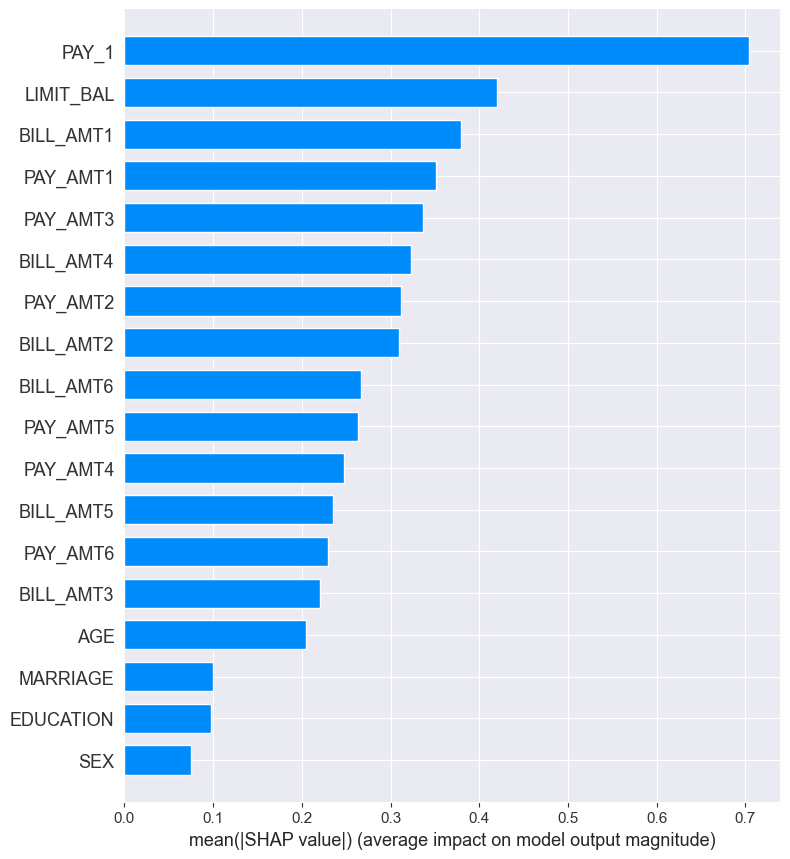

In [42]:
shap.summary_plot(shap_values, plot_type='bar')

In [43]:
deciles, deciles_edge = pd.qcut(y_probs, q=10, retbins=True)

test_deciles_df = pd.DataFrame({
    'Probabilities': y_probs,
    'Deciles': deciles,
    'Outcome': y_pred
})
test_deciles_df.head()

,Probabilities,Deciles,Outcome
0,0.036309,"(0.025, 0.0418]",0
1,0.038267,"(0.025, 0.0418]",0
2,0.147544,"(0.104, 0.176]",0
3,0.917537,"(0.634, 0.996]",1
4,0.057330,"(0.0418, 0.0663]",0


In [44]:
default_group_decile_rate = test_deciles_df.groupby('Deciles', observed=True).agg({'Outcome': ['count', 'mean'], 'Probabilities': 'mean'})
print(default_group_decile_rate)

                      Outcome           Probabilities
                        count      mean          mean
Deciles                                              
(-0.0009167, 0.00609]     534  0.000000      0.003148
(0.00609, 0.0131]         533  0.000000      0.009446
(0.0131, 0.025]           533  0.000000      0.018585
(0.025, 0.0418]           533  0.000000      0.033107
(0.0418, 0.0663]          534  0.000000      0.053671
(0.0663, 0.104]           533  0.000000      0.084037
(0.104, 0.176]            533  0.000000      0.136579
(0.176, 0.325]            533  0.000000      0.242431
(0.325, 0.634]            533  0.345216      0.456917
(0.634, 0.996]            534  1.000000      0.829362


<Axes: xlabel='Deciles'>

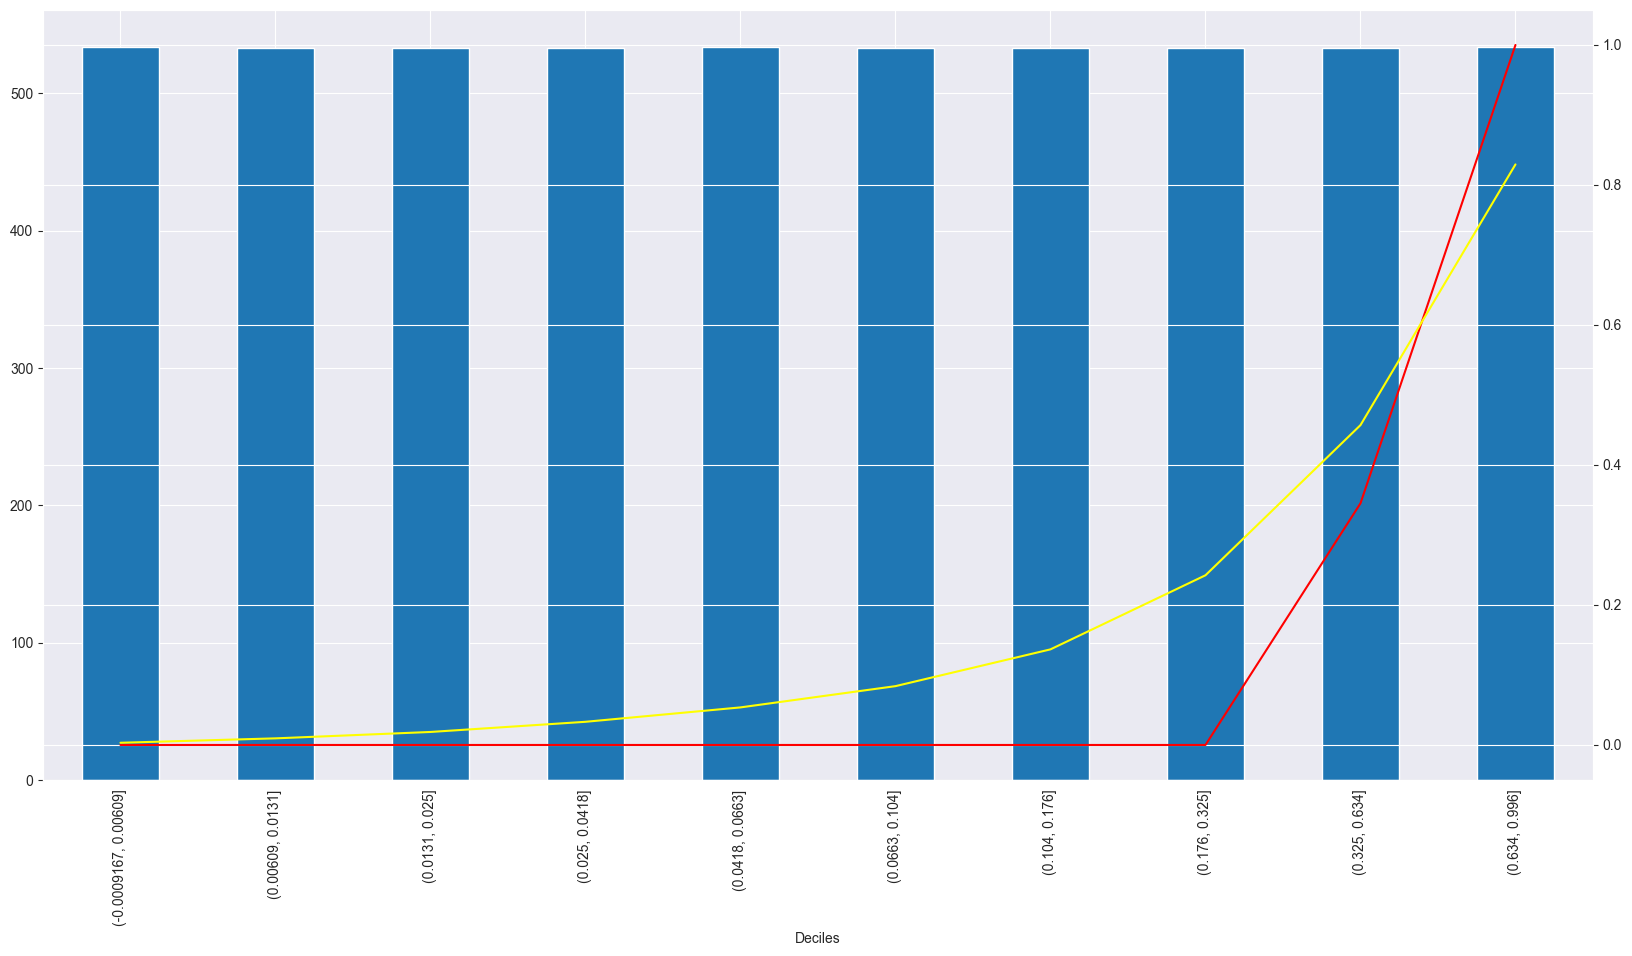

In [45]:
plt.figure(figsize=(20, 10))

ax_1 = plt.axes()
default_group_decile_rate[('Outcome', 'count')].plot(ax=ax_1, kind='bar')

ax_2 = ax_1.twinx()
default_group_decile_rate[('Outcome', 'mean')].plot(ax=ax_2, color='red')

default_group_decile_rate[('Probabilities', 'mean')].plot(ax=ax_2, color='yellow')

In [46]:
cuts, cuts_edges = pd.cut(y_probs, bins=5, retbins=True)

default_cut_rate_df = pd.DataFrame({
    'Predictions': y_probs, 
     'Prediction Cuts': cuts, 
     'Outcome': y_pred
})

default_cut_rate_df.head()

,Predictions,Prediction Cuts,Outcome
0,0.036309,"(-0.000913, 0.199]",0
1,0.038267,"(-0.000913, 0.199]",0
2,0.147544,"(-0.000913, 0.199]",0
3,0.917537,"(0.797, 0.996]",1
4,0.057330,"(-0.000913, 0.199]",0


In [47]:
default_group_cut_rate = default_cut_rate_df.groupby('Prediction Cuts', observed=True).agg({'Outcome': ['count', 'mean']})
print(default_group_cut_rate)

                   Outcome          
                     count      mean
Prediction Cuts                     
(-0.000913, 0.199]    3849  0.000000
(0.199, 0.399]         589  0.000000
(0.399, 0.598]         319  0.445141
(0.598, 0.797]         252  1.000000
(0.797, 0.996]         324  1.000000


In [48]:
p = default_group_cut_rate[('Outcome', 'mean')].values
n = default_group_cut_rate[('Outcome', 'count')].values

se = np.sqrt((p * (1 - p)) / n)
print(se)

[0.         0.         0.02782562 0.         0.        ]


<Axes: xlabel='Prediction Cuts'>

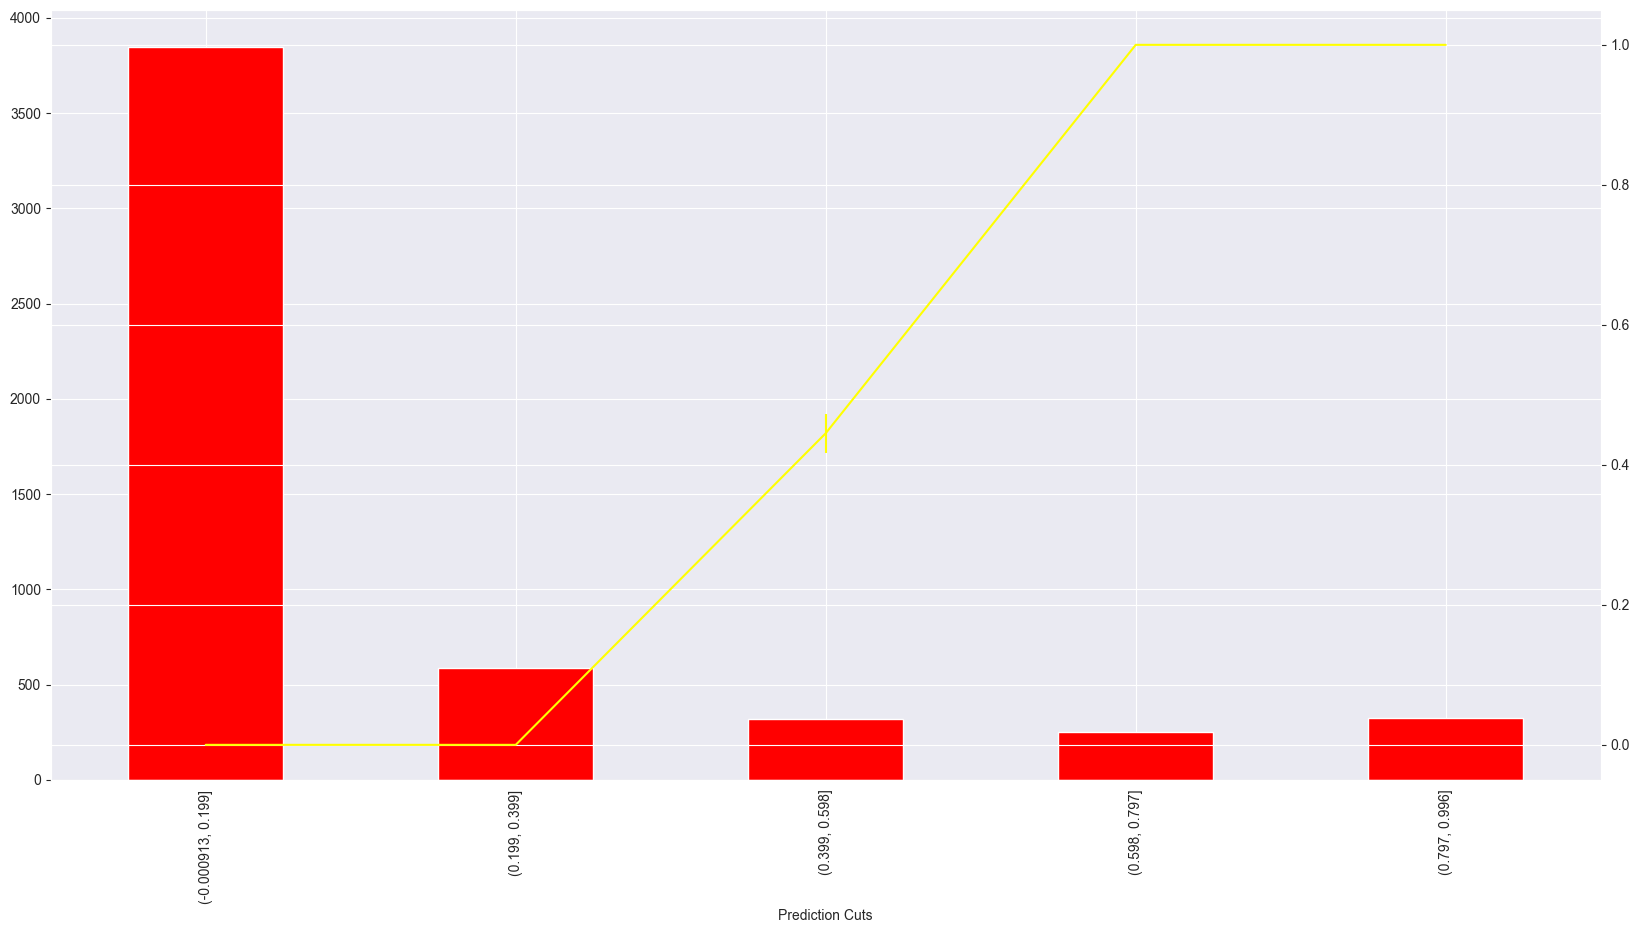

In [49]:
plt.figure(figsize=(20, 10))

ax_1 = plt.axes()
default_group_cut_rate[('Outcome', 'count')].plot(ax=ax_1, color='red', kind='bar')

ax_2 = ax_1.twinx()
default_group_cut_rate[('Outcome', 'mean')].plot(ax=ax_2, color='yellow', yerr=se)

In [50]:
f = default_group_decile_rate[('Outcome', 'count')].values / y_probs.shape[0]
o = default_group_decile_rate[('Outcome', 'mean')].values
e = default_group_decile_rate[('Probabilities', 'mean')].values

ece = np.sum(f * np.abs(o - e))
print(ece)

0.08632836810257456


In [62]:
cost_per_counseling = 7500
counseling_effectiveness = 0.7

thresholds = np.linspace(0, 1, 50)

n_pos_pred = np.empty_like(thresholds)
true_pos_pred = np.empty_like(thresholds)
thresholds_net_saving = np.empty_like(thresholds)

for i, threshold in enumerate(thresholds):
    pos_pred = y_probs > threshold
    n_pos_pred[i] = np.sum(pos_pred)
    
    true_pos = y_pred & pos_pred.astype(bool)
    true_pos_pred[i] = np.sum(true_pos)
    
    cost = np.sum(pos_pred.astype(int) * cost_per_counseling)
    saving = np.sum(true_pos.astype(int) * counseling_effectiveness * X_val.iloc[:, 0])
    
    thresholds_net_saving[i] = saving - cost